In [1]:
from fancyimpute import MICE

import missingno as msno # visualzing missing value
import pandas as pd
import numpy as np
import time

# Multivariate imputation by chained equations (MICE), sometimes called “fully conditional specification” or “sequential regression multiple imputation”.

### assumption of MICE is, given the variables used in the imputation procedure, the missing data are Missing At Random (MAR), which means that the probability that a value is missing depends only on observed values(other variables) and not on unobserved values .

### In the MICE procedure,  a series of regression models are run whereby each variable with missing data is modeled conditional on the other variables in the data.
###  This means that each variable can be modeled according to its distribution, with, for example, binary variables modeled using logistic regression and continuous variables modeled using linear regression.
### Library: https://github.com/iskandr/fancyimpute/blob/master/fancyimpute/mice.pyd

# Use an example to demo
### To make the chained equation approach more concrete, imagine a simple example where we have 3 variables in our dataset: age, income, and gender, and all 3 have at least some missing values. The MAR assumption would imply that the probability of a particular variable being missing depends only on the observed values, and that, for example, whether someone’s income is missing does not depend on their (unobserved) income.To make the chained equation approach more concrete, imagine a simple example where we have 3 variables in our dataset: age, income, and gender, and all 3 have at least some missing values. The MAR assumption would imply that the probability of a particular variable being missing depends only on the observed values, and that, for example, whether someone’s income is missing does not depend on their (unobserved) income. In step 1 of the MICE process, each variable would first be imputed using, e.g., mean imputation, temporarily setting any missing value equal to the mean observed value for that variable. Then in step 2 the imputed mean values of age would be set back to missing. In step 3, a linear regression of age predicted by income and gender would be run using all cases where age was observed. In step 4, predictions of the missing age values would be obtained from that regression equation and imputed. At this point, age does not have any missingness. Steps 2–4 would then be repeated for the income variable. The originally missing values of income would be set back to missing and a linear regression of income predicted by age and gender would be run using all cases with income observed; imputations (predictions) would be obtained from that regression equation for the missing income values. Then, steps 2–4 would again be repeated for the variable gender. The originally missing values of gender would be set back to missing and a logistic regression of gender on age and income would be run using all cases with gender observed; predictions from that logistic regression model would be used to impute the missing gender values. This entire process of iterating through the 3 variables would be repeated until convergence; the observed data and the final set of imputed values would then constitute one “complete” data set.



# how to choose which variables need to be included in the imnutation?
### Large datasets naturally lead to the possibility of a very large number of variables to include in the imputation regression models, and it may not always be possible to include all of those variables identified for potential inclusion. Selection of which variables to include can be guided by the types of analyses anticipated for use with the data and an awareness that generously incorporating auxiliary variables in the imputation models poses little risk to the precision or bias of estimates (Collins et al., 2001). 

In [4]:
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute,axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print (df.shape)


(356251, 218)


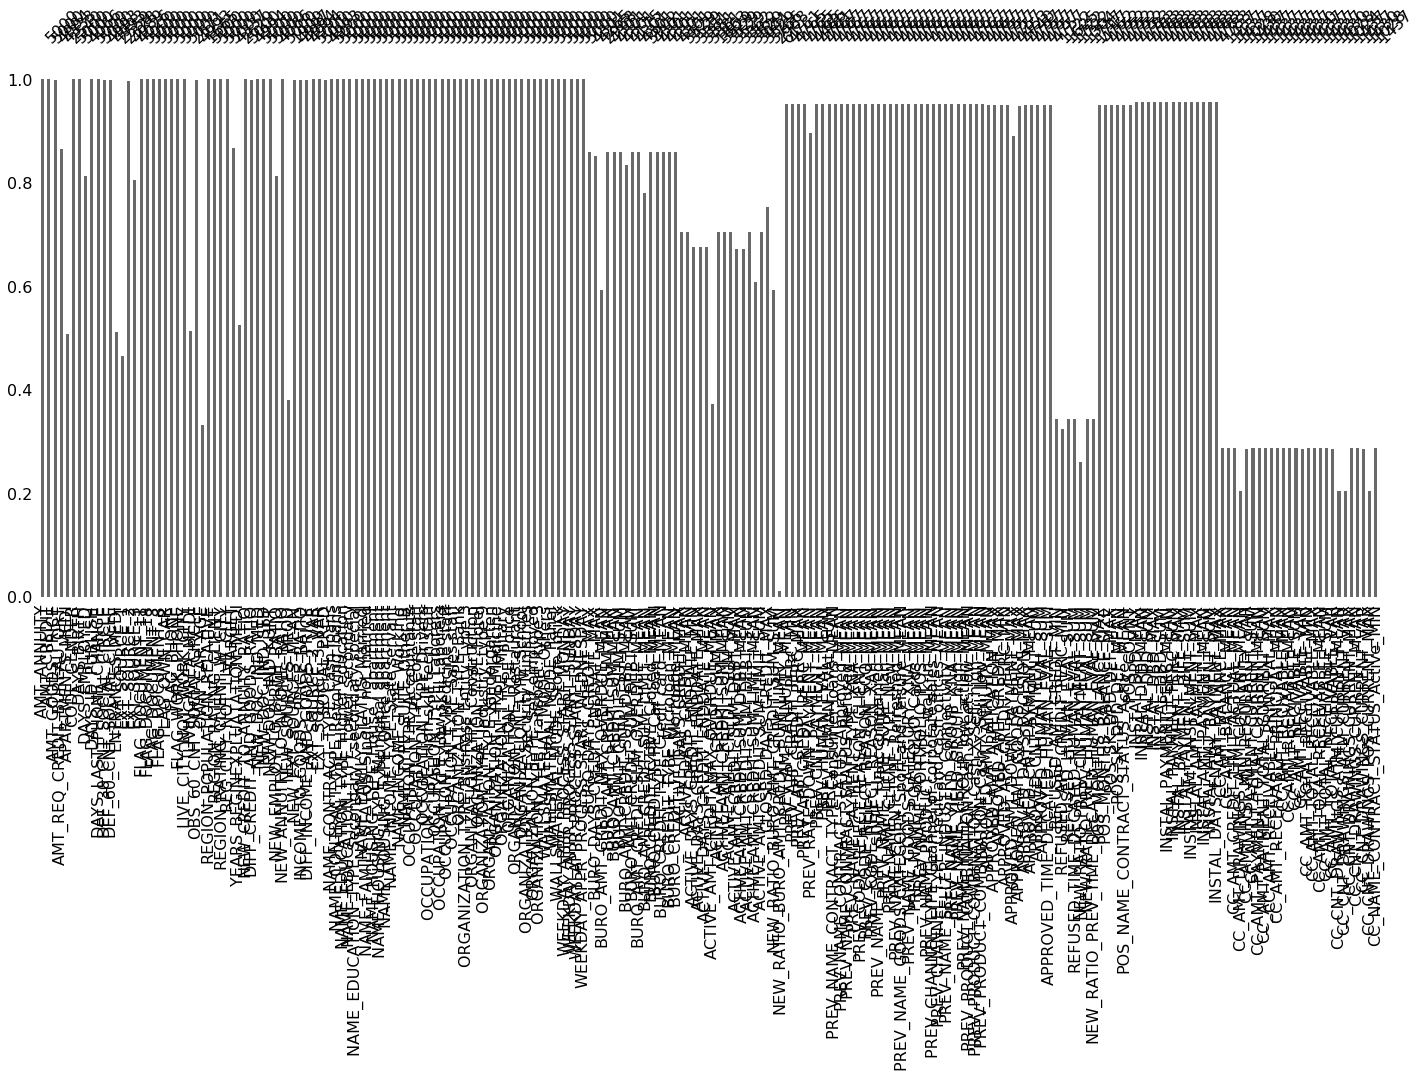

In [5]:
msno.bar(df.sample(5000))

# parameters explorationg of multivariate imputation by chained equation
# n_nearest_columns, 使用全部的最近columns來估計, 和使用ㄧ半的, 對時間上沒什麼差。

In [6]:
df[df.columns.tolist()[: 10]].shape

(356251, 10)

In [31]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358sec ===> 81.27 小時, 肯定不行, 需要挑columns放進去

420.1490170955658


In [8]:
X_missing = df.sample(n = 1000).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358sec ===> 81.27 小時, 肯定不行, 需要挑columns放進去

875.9168910980225


In [33]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358sec ===> 81.27 小時, 肯定不行, 需要挑columns放進去

410.6421766281128


In [13]:
len(df) / 500 * 410.6421766281128 / 60/ 60

81.2731589255232

In [41]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(init_fill_method = 'median').complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358 sec  ===> 81.27 小時, 肯定不行, 需要挑columns放進去

419.7008409500122


In [5]:
X_missing = df[df.columns.tolist()[: 50]].sample(n = 500).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 1/4 features , 11.8382 secsc ===> 2.3429860 小時, 可以接受

17.796082735061646


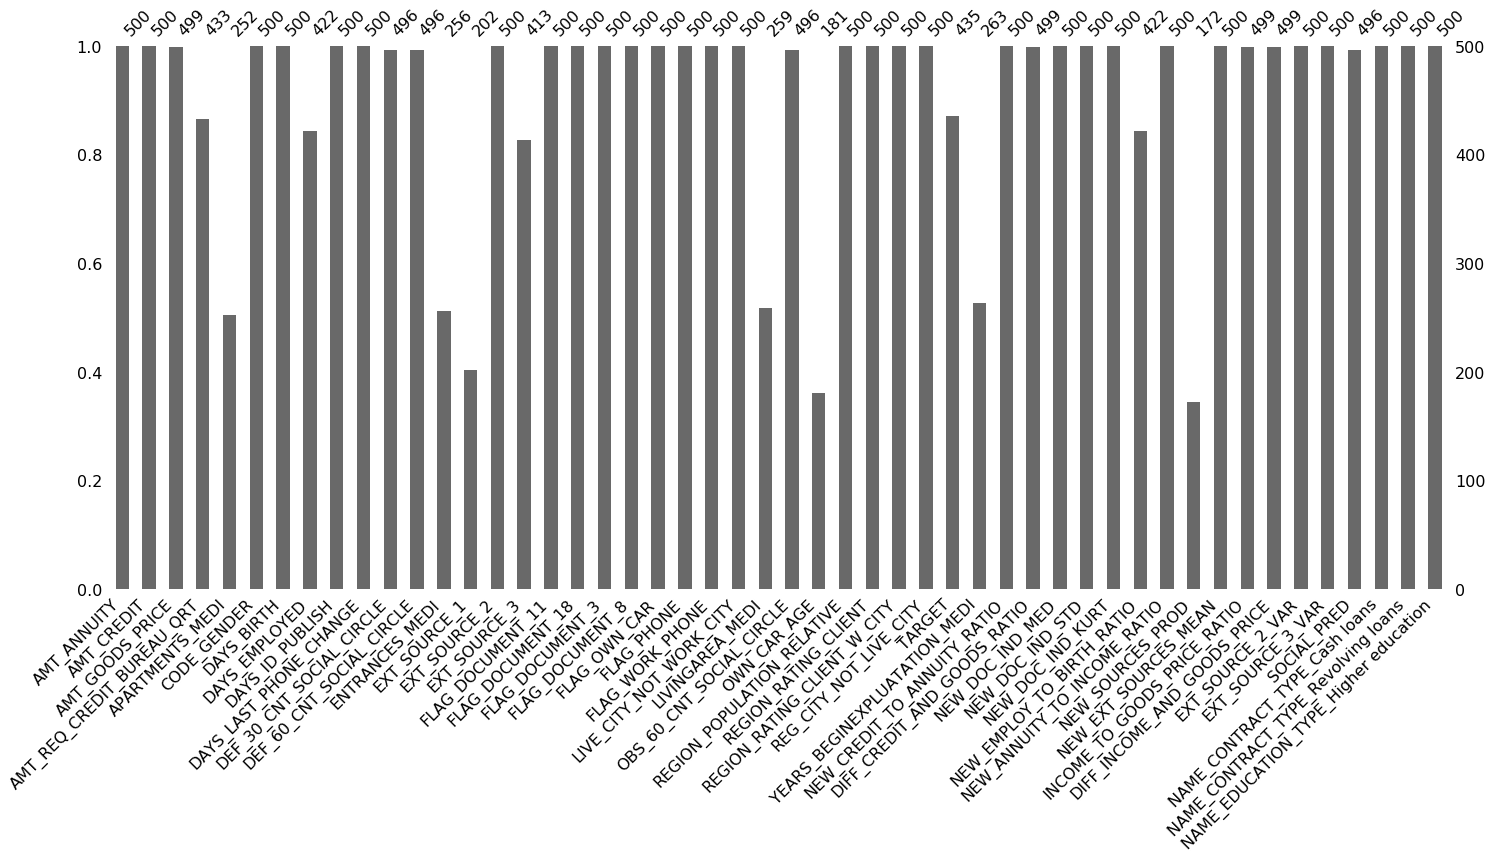

In [6]:
msno.bar(X_missing)

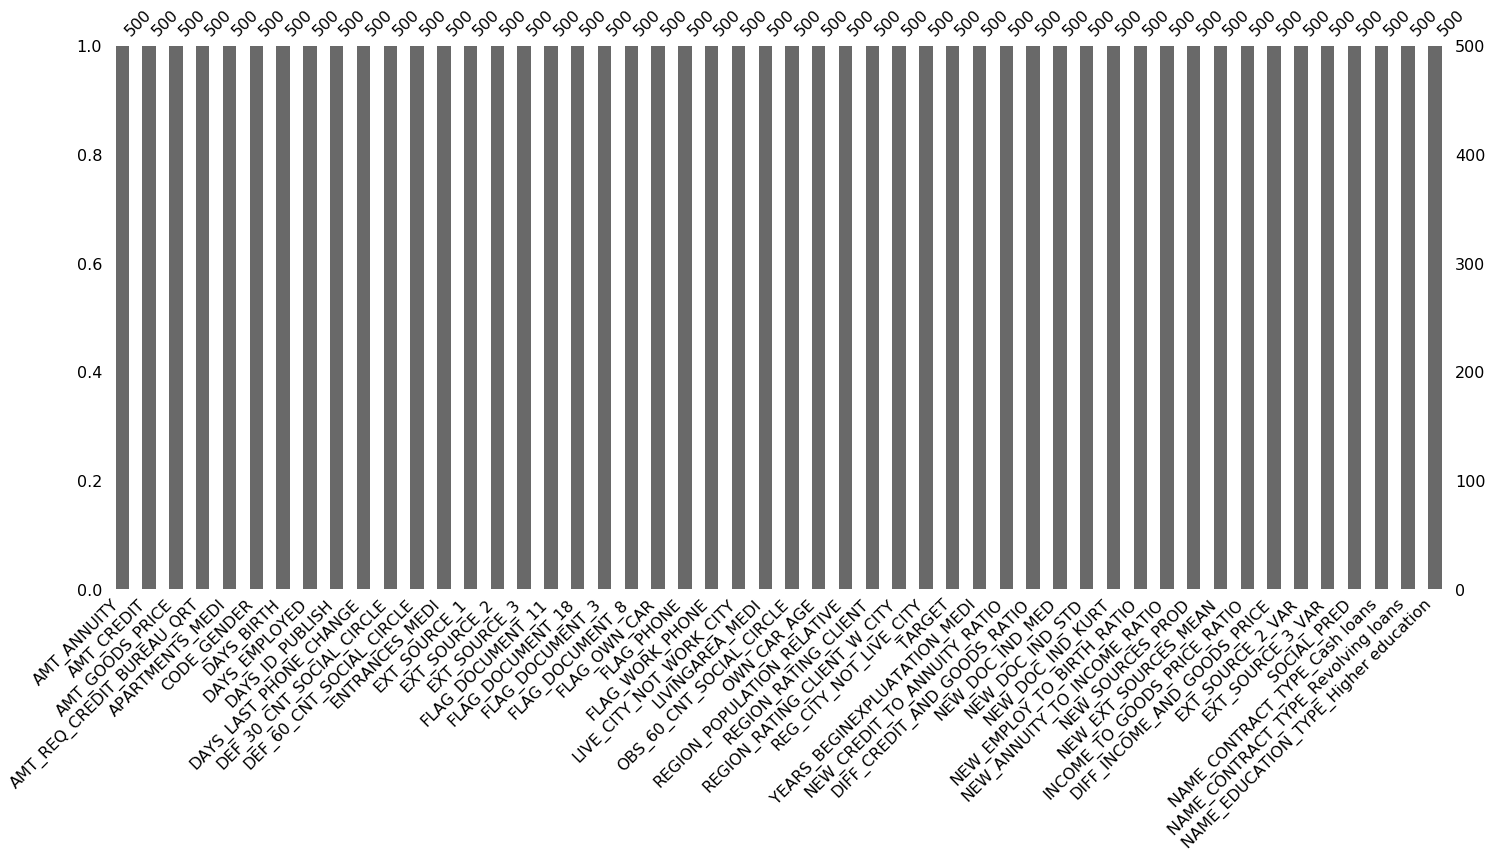

In [7]:
msno.bar(pd.DataFrame(X_filled, columns = X_missing.columns))

# explore

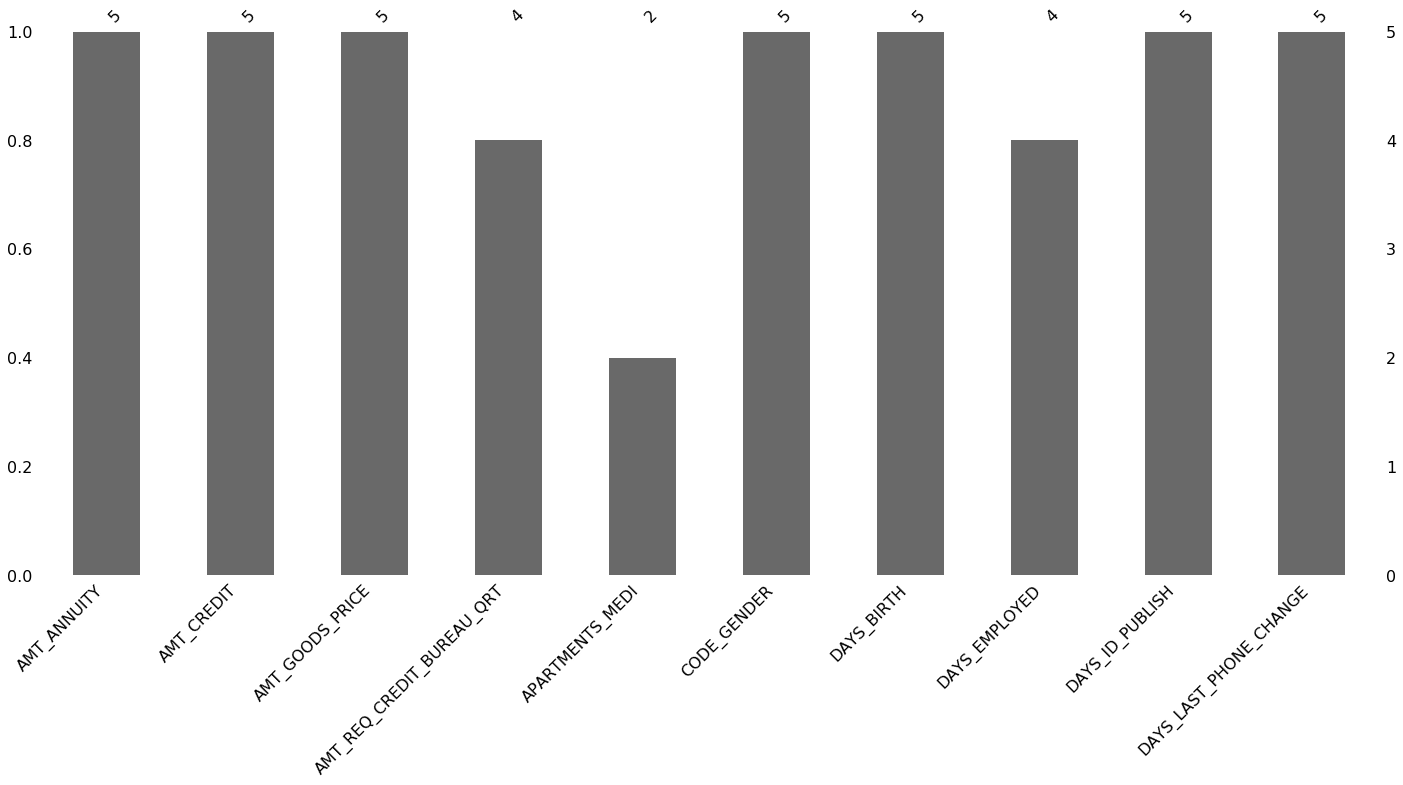

In [19]:
X_missing = df[df.columns.tolist()[: 10]].sample(n = 5).copy()
msno.bar(X_missing)

In [20]:
from ycimpute.imputer.mice import MICE # inputation library

s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 1/4 features , 11.8382 secsc ===> 2.3429860 小時, 可以接受

0.23727846145629883


In [21]:
X_missing

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
250512,8775.0,107820.0,90000.0,0.0,0.0625,1,-17595,-773.0,-1114,-3032.0
75065,42790.5,1006920.0,900000.0,0.0,NaN,1,-18794,-6358.0,-2343,-1623.0
34854,15750.0,315000.0,315000.0,NaN,0.2550,0,-21039,-786.0,-4238,-228.0
328797,30451.5,543037.5,463500.0,0.0,NaN,1,-19140,-8574.0,-2660,-1905.0
297156,18679.5,634482.0,454500.0,0.0,NaN,1,-21815,NaN,-4395,-1330.0


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,8775.0,107820.0,90000.0,0.0,0.0625,1.0,-17595.0,-773.00,-1114.0,-3032.0
1,42790.5,1006920.0,900000.0,0.0,0.2550,1.0,-18794.0,-6358.00,-2343.0,-1623.0
2,15750.0,315000.0,315000.0,0.0,0.2550,0.0,-21039.0,-786.00,-4238.0,-228.0
3,30451.5,543037.5,463500.0,0.0,0.2550,1.0,-19140.0,-8574.00,-2660.0,-1905.0
4,18679.5,634482.0,454500.0,0.0,0.2550,1.0,-21815.0,-5361.96,-4395.0,-1330.0


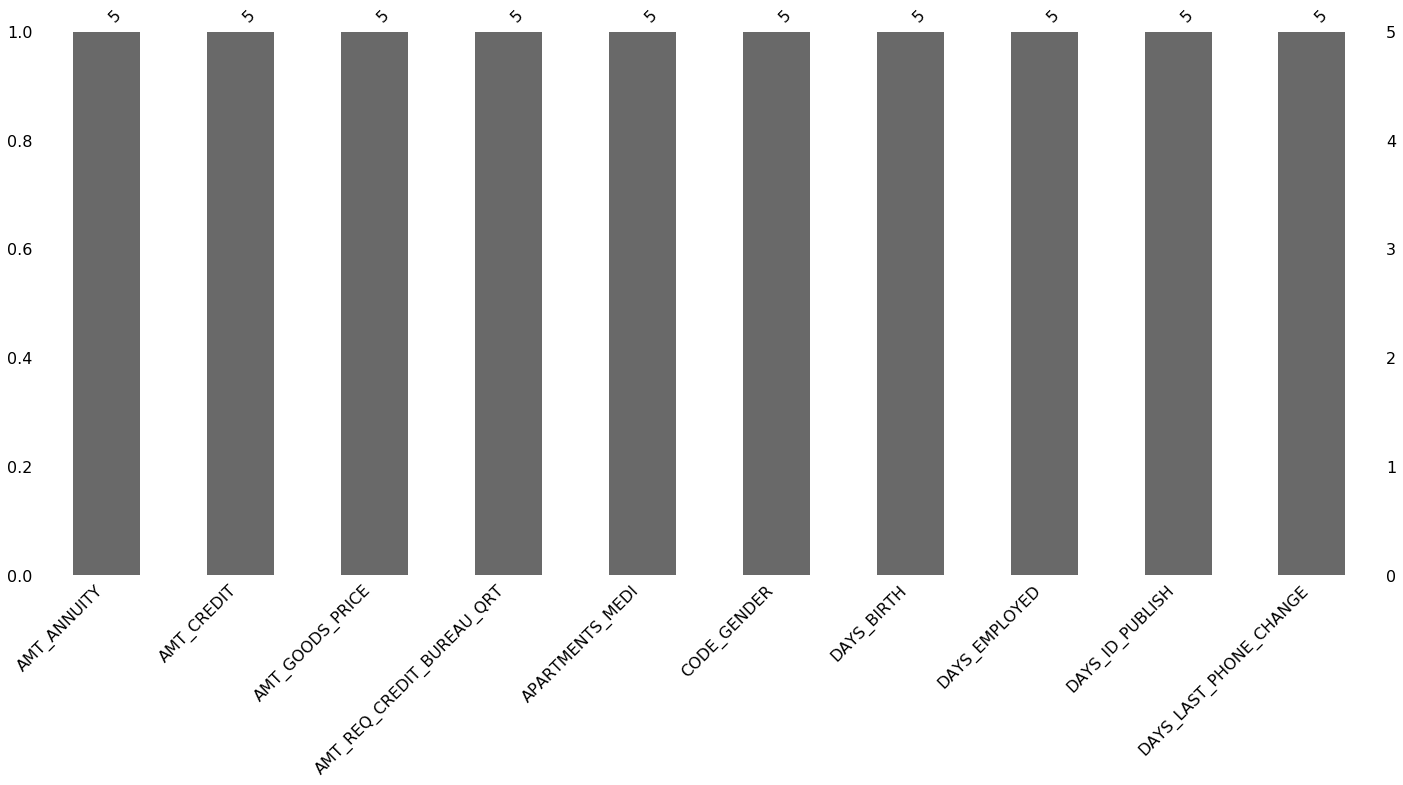

In [22]:
msno.bar(pd.DataFrame(X_filled, columns = X_missing.columns))
pd.DataFrame(X_filled, columns = X_missing.columns)

In [2]:
3852.1237721443 / 60 / 60

1.0700343811511945

# another library
# 關鍵在於可以全部的training example一起放, 但不能全部的features一起放, 需要決定放哪些features.
# 我們把feature分成4坨(or兩坨), 怎麼決定這坨features要放哪些呢? MICE是假設missing value 與非missing之間有關連性來推算, 因此, 我打算找出與最多缺失值欄位, 最有關聯的前一半feature來當作一坨(or 4/1來當作一坨), 第二坨, 這用剩下(3/4當中, 缺失值最大的1/4當作一坨,以此類推。
# 切一半要跑1.07小時(他是linear growing on time u spend)==> 2.14小時
# 一次要跑全部, 估計要7小時

Using TensorFlow backend.


[MICE] Completing matrix with shape (356251, 100)
[MICE] Starting imputation round 1/110, elapsed time 0.387
[MICE] Starting imputation round 2/110, elapsed time 34.821
[MICE] Starting imputation round 3/110, elapsed time 68.991
[MICE] Starting imputation round 4/110, elapsed time 103.700
[MICE] Starting imputation round 5/110, elapsed time 138.536
[MICE] Starting imputation round 6/110, elapsed time 174.456
[MICE] Starting imputation round 7/110, elapsed time 209.544
[MICE] Starting imputation round 8/110, elapsed time 244.670
[MICE] Starting imputation round 9/110, elapsed time 280.711
[MICE] Starting imputation round 10/110, elapsed time 316.932
[MICE] Starting imputation round 11/110, elapsed time 352.832
[MICE] Starting imputation round 12/110, elapsed time 387.150
[MICE] Starting imputation round 13/110, elapsed time 422.145
[MICE] Starting imputation round 14/110, elapsed time 457.135
[MICE] Starting imputation round 15/110, elapsed time 492.440
[MICE] Starting imputation round 

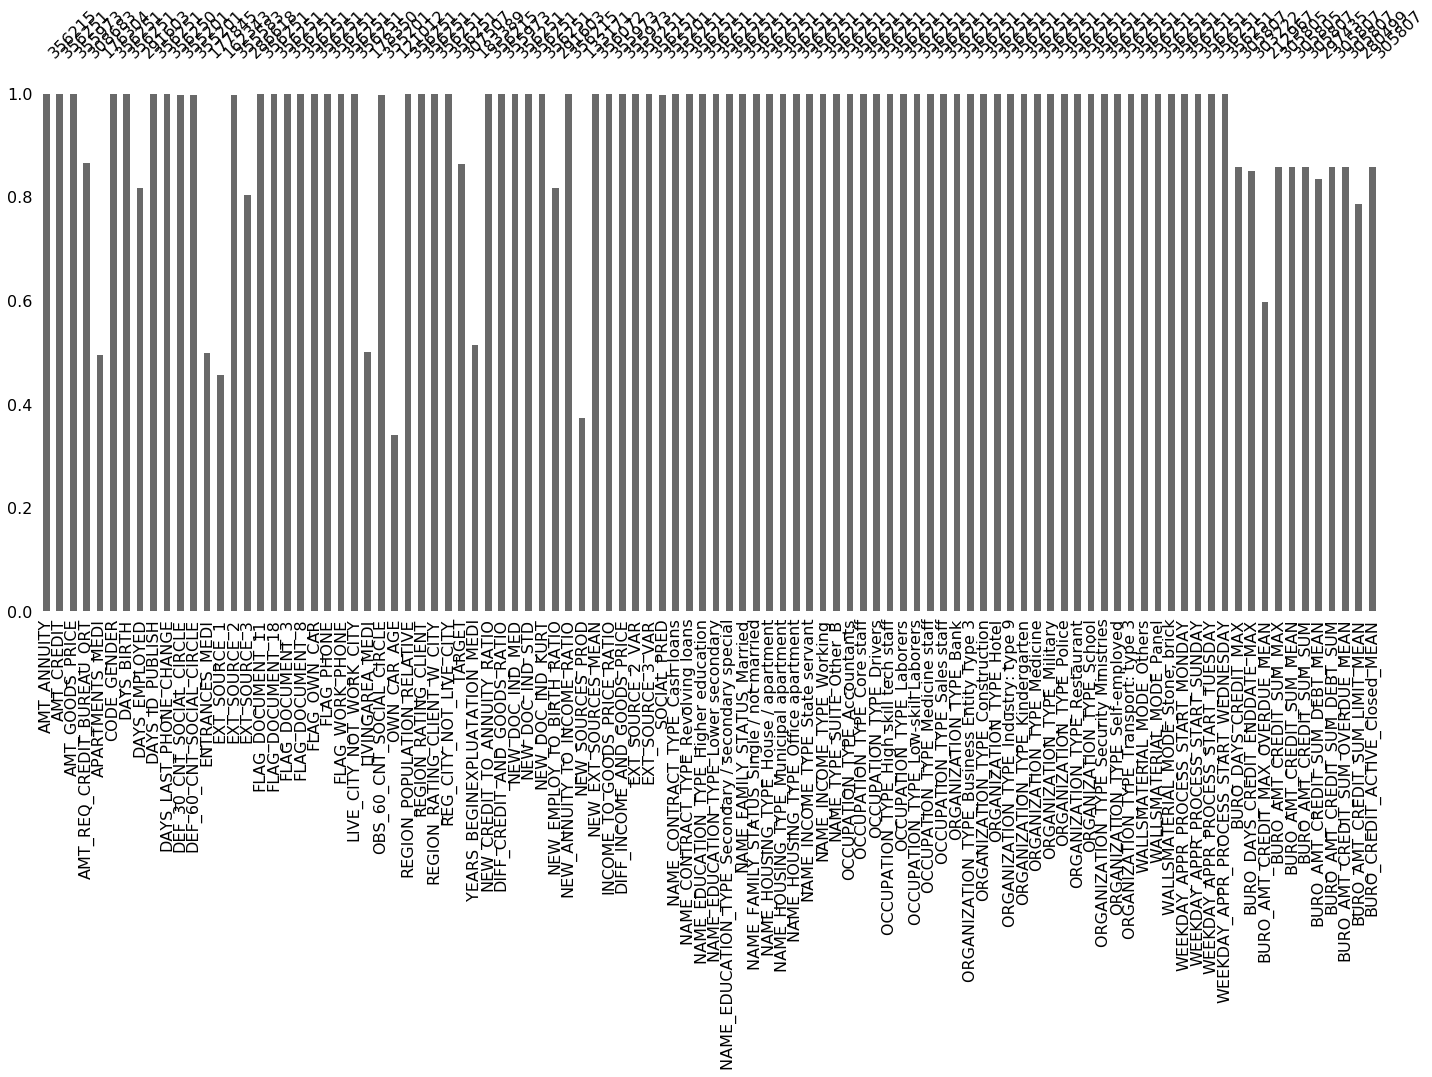

In [4]:
from fancyimpute import MICE
X_missing = df[df.columns.tolist()[: 100]].copy()
msno.bar(X_missing)
s = time.time()
X_filled = MICE().complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 10/200 features , 62.37022066116333 secsc ===> 2.3429860 小時, 可以接受

(356251, 218)
[MICE] Completing matrix with shape (356251, 218)
[MICE] Starting imputation round 1/110, elapsed time 1.035
[MICE] Starting imputation round 2/110, elapsed time 217.578
[MICE] Starting imputation round 3/110, elapsed time 433.678
[MICE] Starting imputation round 4/110, elapsed time 649.856


KeyboardInterrupt: 

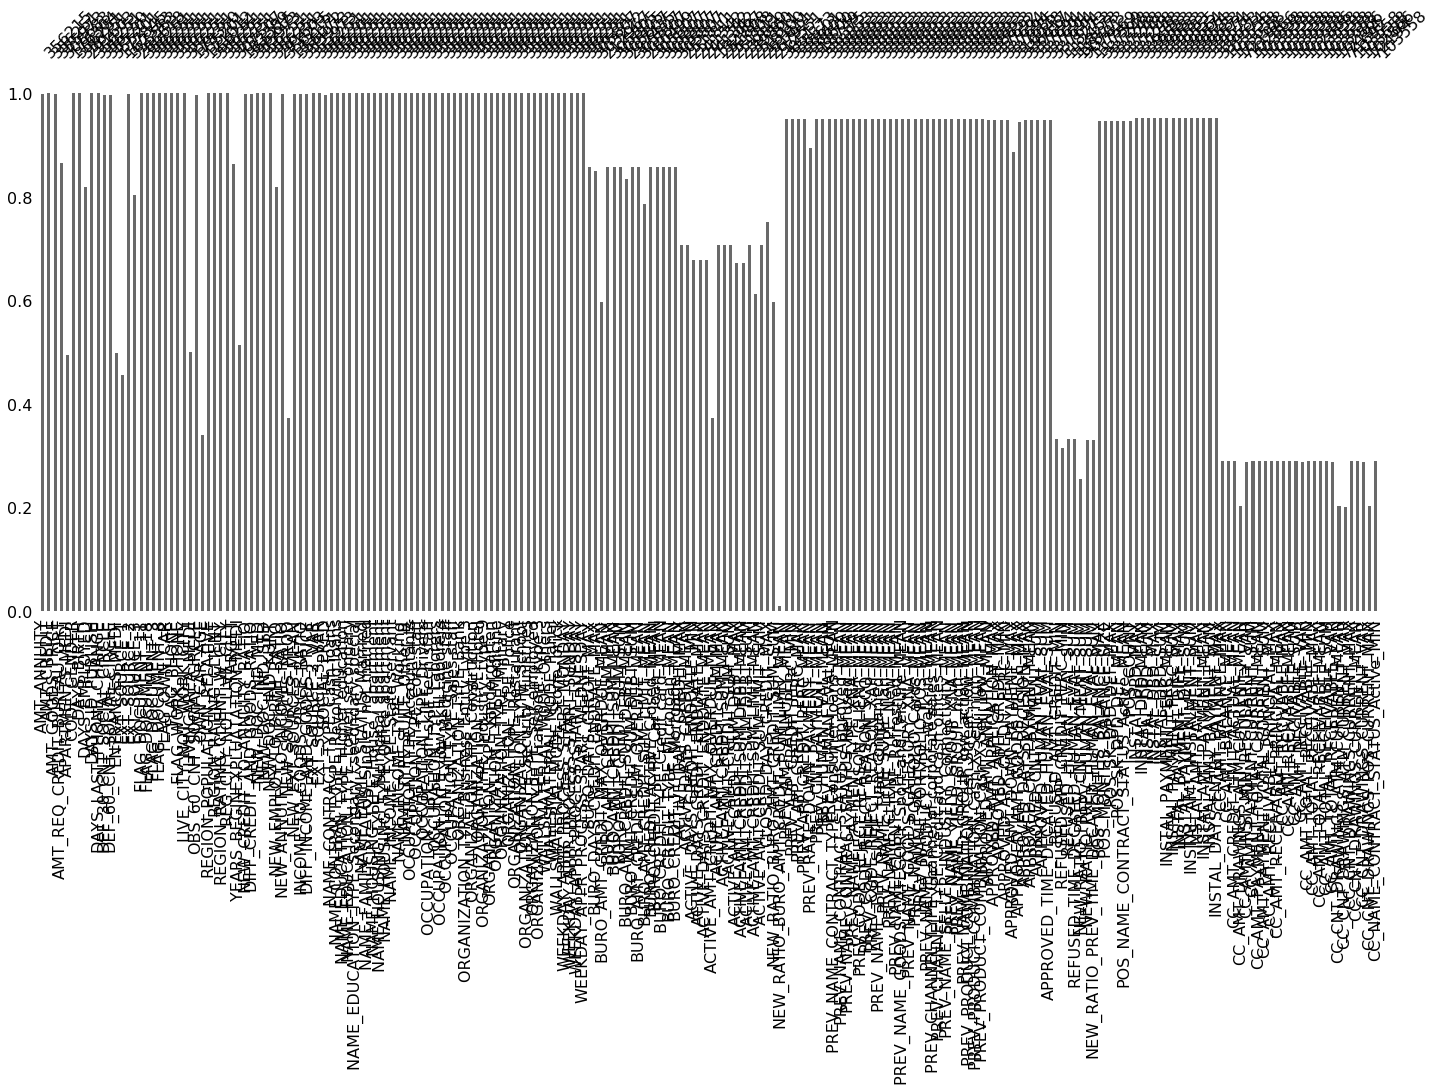

In [9]:
from fancyimpute import MICE
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute,axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print (df.shape)

X_missing = df[df.columns.tolist()[:]].copy()
msno.bar(X_missing)
s = time.time()
X_filled = MICE().complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 10/200 features , 62.37022066116333 secsc ===> 2.3429860 小時, 可以接受

(356251, 10)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,24700.5,406597.5,351000.0,0.000000,0.025000,0.0,-9461.0,-637.000000,-2120.0,-1134.0
1,35698.5,1293502.5,1129500.0,0.000000,0.096800,1.0,-16765.0,-1188.000000,-291.0,-828.0
2,6750.0,135000.0,135000.0,0.000000,0.123182,0.0,-19046.0,-225.000000,-2531.0,-815.0
3,29686.5,312682.5,297000.0,0.242014,0.136495,1.0,-19005.0,-3039.000000,-2437.0,-617.0
4,21865.5,513000.0,513000.0,0.000000,0.119826,0.0,-19932.0,-3038.000000,-3458.0,-1106.0
5,27517.5,490495.5,454500.0,1.000000,0.128186,0.0,-16941.0,-1588.000000,-477.0,-2536.0
6,41301.0,1560726.0,1395000.0,1.000000,0.122376,1.0,-13778.0,-3130.000000,-619.0,-1562.0
7,42075.0,1530000.0,1530000.0,0.000000,0.110629,0.0,-18850.0,-449.000000,-2379.0,-1070.0
8,33826.5,1019610.0,913500.0,0.000000,0.120311,1.0,-20099.0,-3137.527752,-3514.0,0.0
9,20250.0,405000.0,405000.0,0.352820,0.135947,0.0,-14469.0,-2019.000000,-3992.0,-1673.0


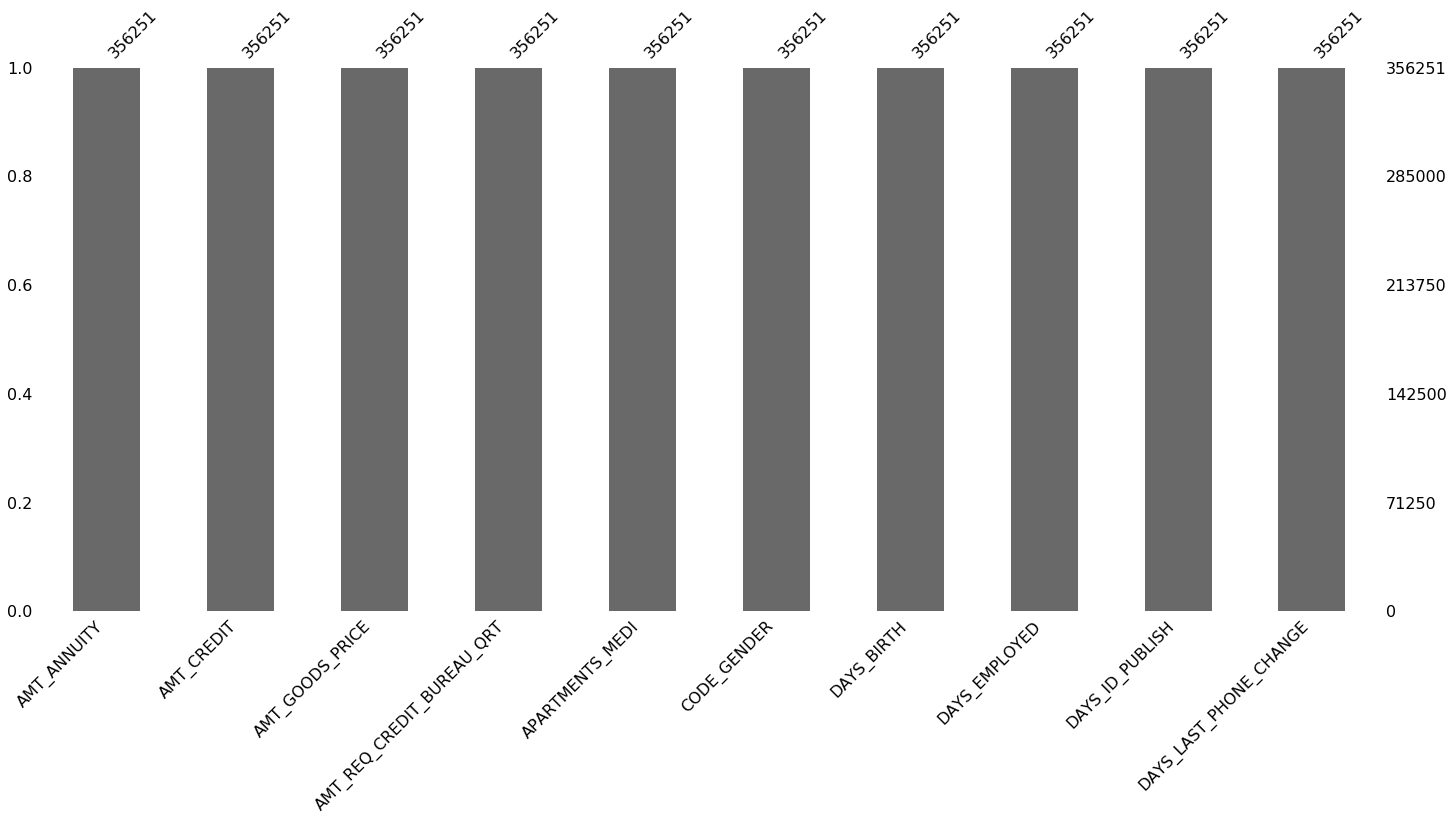

In [31]:
msno.bar(pd.DataFrame(X_filled, columns = X_missing.columns))
X_filled = pd.DataFrame(X_filled, columns = X_missing.columns)
print (X_filled.shape)
X_filled

In [3]:
from fancyimpute import MICE # for imputing
import pandas as pd
import numpy as np
import multiprocessing as mp # for speeding up some process
import os
import gc
import time
#---------------------------------------------
# Step1: preprocessing for MICE
#---------------------------------------------

df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print ('The shape of DataFrame needed to complete : ',df.shape)




The shapeo of DataFrame needed to complete :  (356251, 218)


In [7]:
#---------------------------------------------
# Step2: imputatiing based on imputation method u chossed
#---------------------------------------------

def imputation():
    '''
    visit_sequence: order in which we visit the columns, monotone" (default), "roman", "arabic", "revmonotone
    impute_type: probablistic moment matching or posterior predictive distribution (default).
    init_fill_method: "mean" (default), "median", or "random".
    '''
    #-------------------
    # preprocessing for algorithm
    #-------------------
    for drop_targtet in [True, False]:
        if drop_targtet == True:
            # avoidnig using TARGET to impute, 
            name = 'wo_target'
            X_missing = df.copy()
            X_missing.drop(['TARGET'], axis =1, inplace = True)

        else:
            name = 'w_target'
            X_missing = df.copy()
            # what I expected, maybe the TARGET variable is the auxiliary variable, so w target may be helful for imputation, then local CV is upper. 
        #-------------------
        # core algorithm: input should be array
        #-------------------
        X_filled = MICE(visit_sequence = 'monotone', 
                        impute_type = 'col',
                        init_fill_method = 'mean').complete(X_missing.values)

        #-------------------
        # output
        #-------------------
        X_filled = pd.DataFrame(X_filled, columns = X_missing.columns)
        gc.collect()
        #-------------------
        # save
        #-------------------
        output_path = '../features/filled_by_mice'
        if not os.path.isdir(output_path):
            os.mkdir(output_path)

        X_filled.to_hdf(
            os.path.join(output_path, 'base_featurs_filled_mice_{}.h5'.format(name)), 
            'base_featurs_filled_mice_{}.h5'.format(name))

In [9]:
imputation()

[MICE] Completing matrix with shape (356251, 217)
[MICE] Starting imputation round 1/110, elapsed time 4.324


KeyboardInterrupt: 